<a href="https://colab.research.google.com/github/justbriang/ML_Task/blob/main/ML_GroupTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1134]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.optimizers import Adam
from tensorflow import keras 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense
from tensorflow.keras.callbacks import  EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from sklearn import linear_model
from sklearn.linear_model import LassoCV,Lasso
import matplotlib.pyplot as plt

#Mount Drive inorder to Access the Data

In [1079]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read the csv

In [1080]:
data=pd.read_csv("/content/drive/MyDrive/ML_tasks/Housing Pricing.csv");
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [1081]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [1082]:
data.shape

(1460, 77)

#Drop ID column since it will not be used

In [1083]:
data.drop('Id',inplace=True,axis=1)


In [1084]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#Check data set size/length

In [1085]:
original_features=list(data.columns)
len(original_features)

76

#Check for missing values

In [1086]:
features_missing_values=list(data.columns[data.isnull().any()])
len(features_missing_values)

15

In [1087]:
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

# Fill In missing Values

In filling the missing values, we fill the columns with float datatype using the columns mean and the other columns will we use bfill().bfill() is used to backward fill the missing values in the dataset.




#Identify Datatypes of columns.

The float datatype columns will be placed in mean_fill list, and the rest in the b_fill list

In [1088]:
#Initialize the lists
b_fill,mean_fill=[],[]


In [1089]:
for feature in features_missing_values:
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    b_fill.append(feature)

In [1090]:
#contents of mean_fill
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [1091]:
#contents of b_fill
b_fill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [1092]:
#fill in missing values using means of the respective columns
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [1093]:
#Fill in missing values using bfill
for feature in b_fill:
  data[feature].fillna(method='bfill',inplace=True)

#Confirm that the missing values were filled in successfully

In [1094]:
missing_values=list(data.columns[data.isnull().any()])
len(missing_values)

1

So there are still missing feature values, lets check the column

In [1095]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

How? Well thats a surprise, I mean didn't we just fill the missing values for this column using bfill(note: datatype is not float)? Yes we did. But the thing is we used bfill, and bfill backward fills the missing values, in simpler terms it fill a missing value with the next value on the column, therfore in the event the missing value is the last value of the column then there is no value to use in filling it.Lets check the tail of this column just to confirm this theory.

In [1096]:

data['FireplaceQu'].tail()

1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, dtype: object

So what do we do now? Well the solution is to use ffill for which will forward fill the missing values  

In [1097]:
#using ffill
data['FireplaceQu'].fillna(method='ffill',inplace=True)

Check if ffill actually solved the issue

In [1098]:
missing_values=list(data.columns[data.isnull().any()])
len(missing_values)

0

Finally, so no more missing values in our dataset

#Encode the dataset

In order to encode we first need to identify, categorical data and numerical data. Then for categorical data we need to further divide it into ordinal and nominal data


In [1099]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Gd,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


Categorical data is a type of data that can be stored into groups(discete groups) or categories with the aid of names/labels. In identifying columns with categorical data we  do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text. Usually there is a lot more done in advanced levels but for simiplicity, we will take the columns with text as indicating categorical data.

In [1100]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [1101]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1102]:
#Sanity check
data[categorical_features].head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal


We could do the same for numerical data(where we check the data for datatypes int64, float64 ...) but there is an easier way, where just take a set of the original features and subtract the categorical features. This leaves just the numerical



In [1103]:
numerical=list(set(original_features)-set(categorical_features))
numerical

data[numerical]

,TotRmsAbvGrd,LotFrontage,GarageCars,OpenPorchSF,YearBuilt,BsmtFullBath,LotArea,YearRemodAdd,GarageYrBlt,BedroomAbvGr,BsmtHalfBath,MasVnrArea,Fireplaces,GarageArea,OverallCond,PoolArea,2ndFlrSF,HalfBath,MSSubClass,OverallQual,EnclosedPorch,3SsnPorch,SalePrice,BsmtFinSF1,MiscVal,ScreenPorch,MoSold,GrLivArea,LowQualFinSF,KitchenAbvGr,YrSold,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,FullBath,WoodDeckSF,1stFlrSF
0,8,65.0,2,61,2003,1,8450,2003,2003.0,3,0,196.0,0,548,5,0,854,1,60,7,0,0,208500,706,0,0,2,1710,0,1,2008,856,150,0,2,0,856
1,6,80.0,2,0,1976,0,9600,1976,1976.0,3,1,0.0,1,460,8,0,0,0,20,6,0,0,181500,978,0,0,5,1262,0,1,2007,1262,284,0,2,298,1262
2,6,68.0,2,42,2001,1,11250,2002,2001.0,3,0,162.0,1,608,5,0,866,1,60,7,0,0,223500,486,0,0,9,1786,0,1,2008,920,434,0,2,0,920
3,7,60.0,3,35,1915,1,9550,1970,1998.0,3,0,0.0,1,642,5,0,756,0,70,7,272,0,140000,216,0,0,2,1717,0,1,2006,756,540,0,1,0,961
4,9,84.0,3,84,2000,1,14260,2000,2000.0,4,0,350.0,1,836,5,0,1053,1,60,8,0,0,250000,655,0,0,12,2198,0,1,2008,1145,490,0,2,192,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,62.0,2,40,1999,0,7917,2000,1999.0,3,0,0.0,1,460,5,0,694,1,60,6,0,0,175000,0,0,0,8,1647,0,1,2007,953,953,0,2,0,953
1456,7,85.0,2,0,1978,1,13175,1988,1978.0,3,0,119.0,2,500,6,0,0,0,20,6,0,0,210000,790,0,0,2,2073,0,1,2010,1542,589,163,2,349,2073
1457,9,66.0,1,60,1941,0,9042,2006,1941.0,4,0,0.0,2,252,9,0,1152,0,70,7,0,0,266500,275,2500,0,5,2340,0,1,2010,1152,877,0,2,0,1188
1458,5,68.0,1,0,1950,1,9717,1996,1950.0,2,0,0.0,0,240,6,0,0,0,20,5,112,0,142125,49,0,0,4,1078,0,1,2010,1078,0,1029,1,366,1078


In [1104]:
#Sanity check
data[numerical].dtypes

TotRmsAbvGrd       int64
LotFrontage      float64
GarageCars         int64
OpenPorchSF        int64
YearBuilt          int64
BsmtFullBath       int64
LotArea            int64
YearRemodAdd       int64
GarageYrBlt      float64
BedroomAbvGr       int64
BsmtHalfBath       int64
MasVnrArea       float64
Fireplaces         int64
GarageArea         int64
OverallCond        int64
PoolArea           int64
2ndFlrSF           int64
HalfBath           int64
MSSubClass         int64
OverallQual        int64
EnclosedPorch      int64
3SsnPorch          int64
SalePrice          int64
BsmtFinSF1         int64
MiscVal            int64
ScreenPorch        int64
MoSold             int64
GrLivArea          int64
LowQualFinSF       int64
KitchenAbvGr       int64
YrSold             int64
TotalBsmtSF        int64
BsmtUnfSF          int64
BsmtFinSF2         int64
FullBath           int64
WoodDeckSF         int64
1stFlrSF           int64
dtype: object

Now we have categorical data and numerical data. But it is important to note that categorical data can further be broken down into two groups namely: nominal and ordinal data.


> nomical data -Categorical data type with no set order in it(no numerical value is assigned to the lables)


> ordinal data-Categorical data type with a set order in it(Sense of order)(numerical value)




In [1105]:
#indentify Nominal data & Ordinal data
nominal=['MSZoning','LandContour','Neighborhood','Street']
ordinal=list(set(categorical_features)-set(nominal))

In [1106]:
#sanity check
nominal

['MSZoning', 'LandContour', 'Neighborhood', 'Street']

In [1107]:
#sanity check
ordinal

['BsmtQual',
 'Exterior2nd',
 'SaleType',
 'FireplaceQu',
 'Condition1',
 'LandSlope',
 'HouseStyle',
 'Condition2',
 'GarageFinish',
 'LotConfig',
 'BsmtExposure',
 'KitchenQual',
 'Foundation',
 'GarageQual',
 'BsmtFinType2',
 'BldgType',
 'CentralAir',
 'HeatingQC',
 'SaleCondition',
 'MasVnrType',
 'ExterCond',
 'BsmtFinType1',
 'Exterior1st',
 'GarageType',
 'Utilities',
 'PavedDrive',
 'RoofStyle',
 'LotShape',
 'BsmtCond',
 'ExterQual',
 'GarageCond',
 'RoofMatl',
 'Electrical',
 'Heating',
 'Functional']

In [1108]:
#target
target=['SalePrice']
target

['SalePrice']

We will now carry out one hot encoding to the nominal data.
Many machine learning algorithms cannot work with categorical data directly, instead they work with numerical data. We therefore have to convert any categorical data to numerical.
Where we will carry out one hot encoding for nominal data and integer/label encoding for ordinal data.

> A one hot encoding allows the representation of categorical data to be more expressive.

> In integer encoding each unique category value is assigned an integer valueThe integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.



In [1109]:
#one hot encode the nominal data - this can be done in two ways pd.get_dummies() way or using sklearn preprocessing

df_nominal=pd.get_dummies(data[nominal])
df_nominal

# encoder = OneHotEncoder(sparse=False)
# # transform data
# df_nominal = encoder.fit_transform(data[nominal])
# data[nominal].columns
#pd.DataFrame(df_nominal,columns=data[nominal].columns)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1110]:
#Label/integer encoding

encoder = OrdinalEncoder()
#transform data
df_ordinal = encoder.fit_transform(data[ordinal])
df_ordinal
#pd.DataFrame(df_ordinal,columns=data[ordinal].columns)

array([[ 2., 13.,  8., ...,  4.,  1.,  6.],
       [ 2.,  8.,  8., ...,  4.,  1.,  6.],
       [ 2., 13.,  8., ...,  4.,  1.,  6.],
       ...,
       [ 3.,  5.,  8., ...,  4.,  1.,  6.],
       [ 3.,  8.,  8., ...,  0.,  1.,  6.],
       [ 3.,  6.,  8., ...,  4.,  1.,  6.]])

Having succesfully encoded the categorical data, we will now concatinate our new data into a new dataframe.

In [1111]:
#note:onehotencode and ordinalencoder produce numpy arrays, therefore we will need to convert them back to dataframe before concatinating usingpd.dataframe
new_data=pd.concat([df_nominal,pd.DataFrame(df_ordinal,columns=data[ordinal].columns),data[numerical]],axis=1)
new_data.tail(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,BsmtQual,Exterior2nd,SaleType,FireplaceQu,...,Electrical,Heating,Functional,TotRmsAbvGrd,LotFrontage,GarageCars,OpenPorchSF,YearBuilt,BsmtFullBath,LotArea,YearRemodAdd,GarageYrBlt,BedroomAbvGr,BsmtHalfBath,MasVnrArea,Fireplaces,GarageArea,OverallCond,PoolArea,2ndFlrSF,HalfBath,MSSubClass,OverallQual,EnclosedPorch,3SsnPorch,SalePrice,BsmtFinSF1,MiscVal,ScreenPorch,MoSold,GrLivArea,LowQualFinSF,KitchenAbvGr,YrSold,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,FullBath,WoodDeckSF,1stFlrSF
1450,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,13.0,8.0,2.0,...,4.0,1.0,6.0,8,60.0,0,45,1974,0,9000,1974,1978.506164,4,0,0.0,0,0,5,0,896,2,90,5,0,0,136000,0,0,0,9,1792,0,2,2009,896,896,0,2,32,896
1451,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.0,5.0,6.0,2.0,...,4.0,1.0,6.0,7,78.0,3,36,2008,0,9262,2009,2008.000000,3,0,194.0,1,840,5,0,0,0,20,8,0,0,287090,0,0,0,5,1578,0,1,2009,1573,1573,0,2,0,1578
1452,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,13.0,8.0,4.0,...,4.0,1.0,6.0,5,35.0,2,28,2005,1,3675,2005,2005.000000,2,0,80.0,0,525,5,0,0,0,180,5,0,0,145000,547,0,0,5,1072,0,1,2006,547,0,0,1,0,1072
1453,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,13.0,8.0,4.0,...,4.0,1.0,6.0,6,90.0,0,56,2006,0,17217,2006,1978.506164,3,0,0.0,0,0,5,0,0,0,20,5,0,0,84500,0,0,0,7,1140,0,1,2006,1140,1140,0,1,36,1140
1454,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.0,13.0,8.0,4.0,...,4.0,1.0,6.0,6,62.0,2,113,2004,1,7500,2005,2004.000000,2,0,0.0,0,400,5,0,0,0,20,7,0,0,185000,410,0,0,10,1221,0,1,2009,1221,811,0,2,0,1221
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,13.0,8.0,4.0,...,4.0,1.0,6.0,7,62.0,2,40,1999,0,7917,2000,1999.000000,3,0,0.0,1,460,5,0,694,1,60,6,0,0,175000,0,0,0,8,1647,0,1,2007,953,953,0,2,0,953
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2.0,10.0,8.0,4.0,...,4.0,1.0,2.0,7,85.0,2,0,1978,1,13175,1988,1978.000000,3,0,119.0,2,500,6,0,0,0,20,6,0,0,210000,790,0,0,2,2073,0,1,2010,1542,589,163,2,349,2073
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,5.0,8.0,2.0,...,4.0,1.0,6.0,9,66.0,1,60,1941,0,9042,2006,1941.000000,4,0,0.0,2,252,9,0,1152,0,70,7,0,0,266500,275,2500,0,5,2340,0,1,2010,1152,877,0,2,0,1188
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,8.0,8.0,2.0,...,0.0,1.0,6.0,5,68.0,1,0,1950,1,9717,1996,1950.000000,2,0,0.0,0,240,6,0,0,0,20,5,112,0,142125,49,0,0,4,1078,0,1,2010,1078,0,1029,1,366,1078
1459,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,6.0,8.0,2.0,...,4.0,1.0,6.0,6,75.0,1,68,1965,1,9937,1965,1965.000000,3,0,0.0,0,276,6,0,0,1,20,5,0,0,147500,830,0,0,6,1256,0,1,2008,1256,136,290,1,736,1256



#Standardize


In standardizing the data we used sklearns MinMax scaler which ideally scales all the data features in the range [0, 1]. We tried out both Standard scaler and minmax scaler and settled on minmax scaler as it resulted in a better model.

In [1112]:
#First we will drop the  target column from our data
new_data.drop('SalePrice',axis=1,inplace=True)

In [1113]:
#Features to numpy array NumPy ndarray inorder to standardize 
X=new_data.to_numpy()
X[0]


array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       2.000e+00, 1.300e+01, 8.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
       5.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
       2.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.200e+01, 1.000e+00,
       0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
       4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 8.000e+00,
       6.500e+01, 2.000e+00, 6.100e+01, 2.003e+03, 1.000e+00, 8.450e+03,
       2.003e+03, 2.003e+03, 3.000e+00, 0.000e+00, 

In [1114]:
#use of the sklearn.preprocessing standardscaler to standardize the X features
#scaler=StandardScaler()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)



In [1115]:
#sanity check]
perm = np.lexsort(X[:, 3::-1].T)
X[perm]

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.1050175 ,
        0.15787058],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.05600933,
        0.11932079],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.17760441],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03350161],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.12849931],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.03500583,
        0.08352455]])

In [1116]:
#Standarzing the target values i.e. Y
y=data[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [1117]:
#y(target) to numpy array NumPy ndarray inorder to standardize 
y=y.to_numpy()

In [1118]:
#standardizing Y
#scaler=StandardScaler(107)
scaler=MinMaxScaler()
y=scaler.fit_transform(y)


In [1119]:
#sanity check107)
y

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

#Split dataset for training and testing

#Feature Selection

In feature selection the data,we used LassoCV which is an iterative process of the Lasso linear model that allows you to find the optimal parameters for a Lasso model using Cross-validation. However, we tried using Lasso and it was  outperformed by LassoCV( Lasso selected only 18 features but still performed poorly).

In [1120]:
lasso_cv=LassoCV()
lasso_cv.fit(X,y)

# lasso=Lasso(alpha=0.1)
# lasso.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Check the selected features

In [1121]:
coef_col = pd.Series(lasso_cv.coef_,index=new_data.columns)
sorted_coef = coef_col.sort_values()
no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the dataset ")

L1 selected only  79  features out of  107  from the dataset 


Assign only the selected feature to the new X

In [1122]:

X=X[:,lasso_cv.coef_!=0]
X.shape

(1460, 79)

#Splitting the dataset into train and test sets in order to train our model.


note: random_state:ensures that the splits that you generate are reproducible i.e. it is best practice, whenever used Scikit-learn algorithm (sklearn. model_selection. train_test_split),it is recommended to used the parameter ( random_state=42) to produce the same results across a different run.

In [1123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train)
X_train.shape

(1022, 79)

In [1124]:
y_train.shape

(1022, 1)



#Train Model

In [1125]:
# important to know the shape of X_train as it tells you the expected input dimension which is vital in the model layer design/layout 
X_train.shape





(1022, 79)

In construction of the model, we had an input_dim of 79 since during feature selection, 79 columns were selected, which implies the shape of our X_train set became (1022,79). 
We also used ReLu activation function in our input and hidden layers and linear activation function in output layers. ReLu(rectified linear activation function)it serves to eleminate negative values since it will output the input directly if it is positive, otherwise, it will output zero. In addition, it does not activate all the neurons at the same time thus make it is easier to train and often achieves better performance.
Linear activation function was used in the output layer since the model is for linear regression which means the output values are unbounded(no classes).

In [1126]:
model = Sequential()
model.add(Dense(200, input_dim=79, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1 ,activation='linear'))
keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer='adam',loss="mse",metrics= ["mse"])




In [1127]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 200)               16000     
_________________________________________________________________
dense_65 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_66 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 201       
Total params: 96,601
Trainable params: 96,601
Non-trainable params: 0
_________________________________________________________________


In [1128]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [1129]:
# save the best model with least validation loss, this is important in the case one wants to export a model
checkpointer = ModelCheckpoint(filepath="Hprice_regression-weights3.hdf5", verbose=1, save_best_only=True)

In [1130]:
 epochs=200

history = model.fit(X_train, y_train,
               
                   epochs =epochs, 
                    validation_split=0.15,
                    batch_size=32,
                    validation_data= None,
                    verbose=1,
                    callbacks=[checkpointer, earlystopping])

Epoch 1/200
28/28 [==============================] - 1s 14ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0019 - val_mse: 0.0019

Epoch 00001: val_loss improved from inf to 0.00190, saving model to Hprice_regression-weights3.hdf5
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0016 - val_mse: 0.0016

Epoch 00002: val_loss improved from 0.00190 to 0.00159, saving model to Hprice_regression-weights3.hdf5
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0011 - val_mse: 0.0011

Epoch 00003: val_loss improved from 0.00159 to 0.00113, saving model to Hprice_regression-weights3.hdf5
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0012 - val_mse: 0.0012

Epoch 00004: val_loss did not improve from 0.00113
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011

#Test trained model 

First we created a Dataframe in order to visualize the trend of metrics of the model, such as loss and mse

---



In [1133]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,loss,mse,val_loss,val_mse
0,0.014176,0.014176,0.001899,0.001899
1,0.002717,0.002717,0.001589,0.001589
2,0.002141,0.002141,0.001132,0.001132
3,0.001718,0.001718,0.001218,0.001218
4,0.001319,0.001319,0.001066,0.001066


In [1136]:
final_loss=historydf['loss'].to_numpy()[-1]
final_mse=historydf['mse'].to_numpy()[-1]

We plotted a graph of the mse and its trend showed that it was decreasing with time, which indicated the model was training well.

Text(0.5, 1.0, 'Final Loss: 0.000, Final acuracy: 0.001')

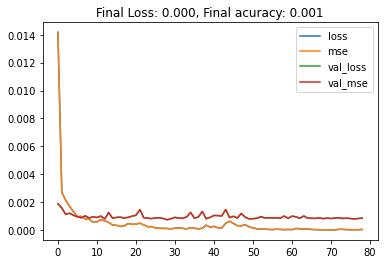

In [1139]:
historydf.plot()
plt.title('Final Loss: %.3f, Final acuracy: %.3f' % (final_loss, final_accuracy))

We then used the model to predict the y values x_test part of the data. For bette understanding of the results we plotted a graph of the y (y_actual) vs y_hat (y_predicted) and a line of the equation.

From the graph the plotted line appeared to be close to the line of best fit for the dataset, and therefore can the trained model can be said to have perfomed fairly well.

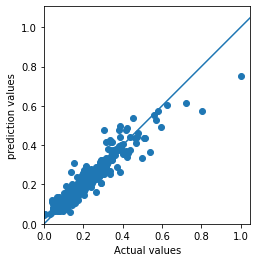

In [1140]:
test_pred=model.predict(X_test).flatten()
plt.scatter(y_test,test_pred)
plt.xlabel("Actual values")
plt.ylabel("prediction values")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-1000,1000],[-1000,1000])


In addition we plotted a histogram of the error and it came close to a bell shape, which therefore represented a set of errors clustering around a true value(Normal distribution). 

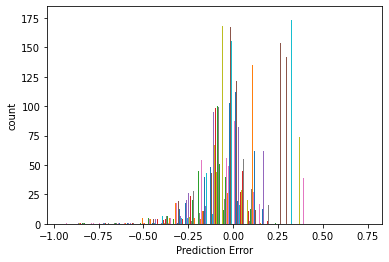

In [1141]:
error=test_pred-y_test
plt.hist(error,bins=25)
plt.xlabel("Prediction Error")
_=plt.ylabel("count")

#Retrieved saved model
This is how we would do it, in case we want to retreive model that was saved by the ModelCheckpoint callback function used earlier

In [1143]:

trained_model=load_model('/content/Hprice_regression-weights3.hdf5')

#Use retrieved model to predict

In [1144]:
test_predict=trained_model.predict(X_test,batch_size=32, verbose=1)

14/14 [==============================] - 0s 1ms/step
